In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
start= '2017-01-01'
end= '2021-10-01'

In [3]:
data=yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK',start=start,end=end)

[*********************100%***********************]  5 of 5 completed


In [36]:
df= data['Adj Close']

In [37]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.146654,29.128025,74.474815,48.913532
2017-01-05,53.759998,28.555840,29.664593,74.096764,49.104607
2017-01-06,53.990002,28.555840,29.817905,74.474815,48.913532
2017-01-09,51.959999,28.555840,29.357977,73.907753,48.340328
...,...,...,...,...,...
2021-09-24,73.980003,NaN,NaN,NaN,NaN
2021-09-27,75.449997,75.753326,37.146828,111.294357,58.820953
2021-09-28,75.290001,75.015472,37.146828,113.196823,60.726082


In [38]:
df = df.fillna(method='ffill')
df = df.pct_change()
df=df.dropna()
df=df[['CL=F','GPSC.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]

In [39]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [41]:
df

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,-0.005076,0.003906,0.018421
2017-01-06,0.004278,0.000000,0.005102,-0.003891,0.005168
2017-01-09,-0.037600,0.000000,-0.007614,-0.011719,-0.015425
2017-01-10,-0.021940,0.006897,-0.017903,0.003953,0.013055
2017-01-11,0.028139,0.006849,0.005208,-0.003937,-0.007732
...,...,...,...,...,...
2021-09-24,0.009277,0.000000,0.000000,0.000000,0.000000
2021-09-27,0.019870,-0.012821,0.035398,0.020661,0.012500
2021-09-28,-0.002121,-0.009740,0.017094,0.032389,0.000000


In [42]:
X_train

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2017-05-22,0.007948,0.007353,0.005319,0.000000
2017-11-22,0.020940,0.008621,0.005391,0.003185
2021-08-12,-0.002311,0.000000,0.000000,0.000000
2017-01-18,-0.026677,-0.006896,-0.015625,0.019531
2019-07-15,-0.010463,-0.006993,0.000000,0.003984
...,...,...,...,...
2018-08-16,0.006922,0.025180,-0.010989,-0.009203
2018-11-01,-0.024805,-0.012987,-0.010753,-0.006472
2017-03-15,0.023889,0.040000,-0.008380,-0.013514


In [43]:
y_train

Date
2017-05-22    0.000000
2017-11-22    0.000000
2021-08-12    0.000000
2017-01-18   -0.005168
2019-07-15    0.000000
                ...   
2018-08-16   -0.009804
2018-11-01   -0.029412
2017-03-15   -0.005038
2018-02-01    0.012195
2018-09-05   -0.033493
Name: PTT.BK, Length: 983, dtype: float64

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

# we  fix this problem

In [46]:
df[df>0]=1
df[df<0]=0

In [47]:
df

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,1.0,0.0,0.0,1.0,1.0
2017-01-06,1.0,0.0,1.0,0.0,1.0
2017-01-09,0.0,0.0,0.0,0.0,0.0
2017-01-10,0.0,1.0,0.0,1.0,1.0
2017-01-11,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
2021-09-24,1.0,0.0,0.0,0.0,0.0
2021-09-27,1.0,0.0,1.0,1.0,1.0
2021-09-28,0.0,0.0,1.0,1.0,0.0


In [48]:
df.dtypes

CL=F        float64
GPSC.BK     float64
PTTEP.BK    float64
PTTGC.BK    float64
PTT.BK      float64
dtype: object

In [49]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [51]:
logreg.predict_proba(X_test)
#predict propability

array([[0.81578069, 0.18421931],
       [0.17220156, 0.82779844],
       [0.70059054, 0.29940946],
       [0.88609912, 0.11390088],
       [0.17220156, 0.82779844],
       [0.33364858, 0.66635142],
       [0.17220156, 0.82779844],
       [0.29960581, 0.70039419],
       [0.19581528, 0.80418472],
       [0.29960581, 0.70039419],
       [0.66085496, 0.33914504],
       [0.29960581, 0.70039419],
       [0.88609912, 0.11390088],
       [0.88609912, 0.11390088],
       [0.17220156, 0.82779844],
       [0.48654779, 0.51345221],
       [0.17220156, 0.82779844],
       [0.90105008, 0.09894992],
       [0.48654779, 0.51345221],
       [0.88609912, 0.11390088],
       [0.19581528, 0.80418472],
       [0.81578069, 0.18421931],
       [0.29960581, 0.70039419],
       [0.81578069, 0.18421931],
       [0.90105008, 0.09894992],
       [0.17220156, 0.82779844],
       [0.66085496, 0.33914504],
       [0.88609912, 0.11390088],
       [0.49293458, 0.50706542],
       [0.70059054, 0.29940946],
       [0.

In [52]:
X_test

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2021-03-09,0.0,1.0,0.0,0.0
2020-06-18,1.0,1.0,1.0,1.0
2017-01-25,0.0,0.0,0.0,1.0
2019-05-15,1.0,0.0,0.0,0.0
2018-10-01,1.0,1.0,1.0,1.0
...,...,...,...,...
2021-06-17,0.0,0.0,0.0,0.0
2020-01-22,0.0,1.0,0.0,0.0
2017-07-17,0.0,0.0,0.0,0.0


In [53]:
y_pred = logreg.predict(X_test)

In [54]:
y_pred

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1.

In [55]:
compare = pd.DataFrame(logreg.predict_proba(X_test))
compare['y_pred']=y_pred
compare

,0,1,y_pred
0,0.815781,0.184219,0.0
1,0.172202,0.827798,1.0
2,0.700591,0.299409,0.0
3,0.886099,0.113901,0.0
4,0.172202,0.827798,1.0
...,...,...,...
241,0.901050,0.098950,0.0
242,0.815781,0.184219,0.0
243,0.901050,0.098950,0.0
244,0.624727,0.375273,0.0


In [56]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[120,  27],
       [ 37,  62]])

Text(0.5, 23.52222222222222, 'Predicted')

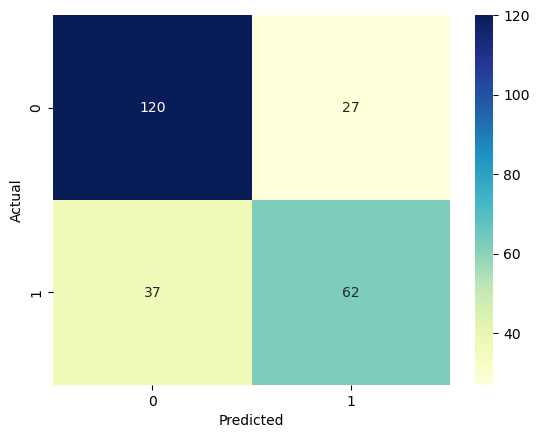

In [57]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [60]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.7398373983739838
Precision: 0.6966292134831461
Recall: 0.6262626262626263


In [61]:
print('F1:',metrics.f1_score(y_test,y_pred))
# is mean this model accurate 65%

F1: 0.6595744680851064


# ROC CURVE

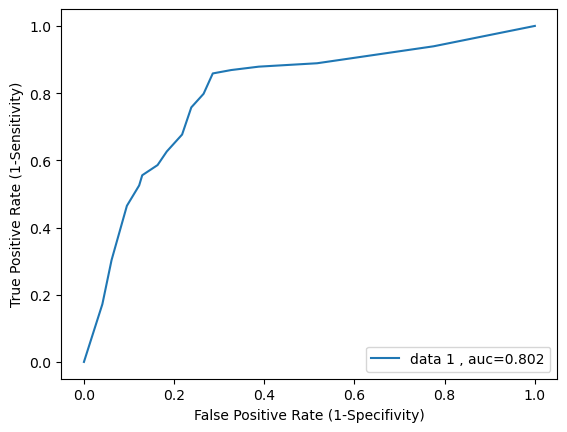

In [62]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1 , auc='+str(round(auc,3)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (1-Specifivity)')
plt.ylabel('True Positive Rate (1-Sensitivity)')
plt.show()

In [63]:
df= data['Adj Close']

In [64]:
df = df.fillna(method='ffill')
df = df.pct_change()
df=df.dropna()
df=df[['CL=F','GPSC.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]

In [65]:
df[df>0] =1
df[df<0]= -1

In [66]:
df

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,1.0,-1.0,-1.0,1.0,1.0
2017-01-06,1.0,0.0,1.0,-1.0,1.0
2017-01-09,-1.0,0.0,-1.0,-1.0,-1.0
2017-01-10,-1.0,1.0,-1.0,1.0,1.0
2017-01-11,1.0,1.0,1.0,-1.0,-1.0
...,...,...,...,...,...
2021-09-24,1.0,0.0,0.0,0.0,0.0
2021-09-27,1.0,-1.0,1.0,1.0,1.0
2021-09-28,-1.0,-1.0,1.0,1.0,0.0


In [67]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [68]:
logreg = LogisticRegression()

In [69]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [70]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[82,  0, 21],
       [18,  0, 26],
       [27,  0, 72]])

Text(0.5, 23.52222222222222, 'Predicted')

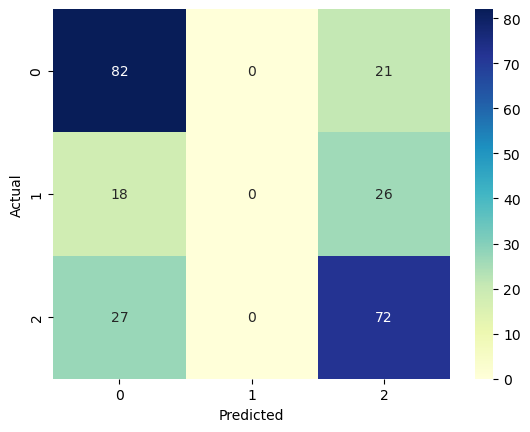

In [71]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Multiclass confusion matrix

# next section

In [77]:
data

Adj Close                                                   Close  \
                 CL=F    GPSC.BK     PTT.BK    PTTEP.BK   PTTGC.BK       CL=F   
Date                                                                            
2017-01-03  52.330002        NaN        NaN         NaN        NaN  52.330002   
2017-01-04  53.259998  29.146654  29.128025   74.474815  48.913532  53.259998   
2017-01-05  53.759998  28.555840  29.664593   74.096764  49.104607  53.759998   
2017-01-06  53.990002  28.555840  29.817905   74.474815  48.913532  53.990002   
2017-01-09  51.959999  28.555840  29.357977   73.907753  48.340328  51.959999   
...               ...        ...        ...         ...        ...        ...   
2021-09-24  73.980003        NaN        NaN         NaN        NaN  73.980003   
2021-09-27  75.449997  75.753326  37.146828  111.294357  58.820953  75.449997   
2021-09-28  75.290001  75.015472  37.146828  113.196823  60.726082  75.290001   
2021-09-29  74.830002  75.015472  37.099571  113.196823  60.249802  74.830002   
2021-09-30  75.029999  74.277611  36.863266  111.769974  60.249802  75.029999   

                                                    ...       Open             \
              GPSC.BK     PTT.BK PTTEP.BK PTTGC.BK  ...       CL=F    GPSC.BK   
Date                                                ...                         
2017-01-03        NaN        NaN      NaN      NaN  ...  54.200001        NaN   
2017-01-04  32.962139  38.000000    98.50    64.00  ...  52.490002  33.184856   
2017-01-05  32.293987  38.700001    98.00    64.25  ...  53.389999  33.184856   
2017-01-06  32.293987  38.900002    98.50    64.00  ...  53.730000  32.516705   
2017-01-09  32.293987  38.299999    97.75    63.25  ...  53.750000  32.516705   
...               ...        ...      ...      ...  ...        ...        ...   
2021-09-24        NaN        NaN      NaN      NaN  ...  73.239998        NaN   
2021-09-27  77.000000  40.500000   117.00    61.75  ...  74.190002  77.500000   
2021-09-28  76.250000  40.500000   119.00    63.75  ...  75.430000  77.000000   
2021-09-29  76.250000  39.250000   119.00    63.25  ...  74.379997  75.500000   
2021-09-30  75.500000  39.000000   117.50    63.25  ...  74.779999  76.250000   

                                           Volume                           \
               PTT.BK PTTEP.BK PTTGC.BK      CL=F     GPSC.BK       PTT.BK   
Date                                                                         
2017-01-03        NaN      NaN      NaN  727793.0         NaN          NaN   
2017-01-04  37.400002    96.25    63.25  512641.0   9234695.0   75879000.0   
2017-01-05  38.200001    98.50    64.25  517362.0   4532206.0   75282000.0   
2017-01-06  38.700001    98.00    64.50  528333.0   2796035.0   45129000.0   
2017-01-09  38.900002    98.50    64.00  564893.0   2037337.0   40455000.0   
...               ...      ...      ...       ...         ...          ...   
2021-09-24        NaN      NaN      NaN  350382.0         NaN          NaN   
2021-09-27  40.250000   115.00    60.50  417829.0   7722100.0  114666600.0   
2021-09-28  40.750000   118.50    62.50  476143.0   7964000.0  104953600.0   
2021-09-29  39.250000   117.00    63.25  424193.0   9205600.0   90070800.0   
2021-09-30  39.000000   119.00    63.25  583189.0  10934900.0   63650300.0   

                                    
              PTTEP.BK    PTTGC.BK  
Date                                
2017-01-03         NaN         NaN  
2017-01-04  17352200.0  14341900.0  
2017-01-05  18246200.0  12762900.0  
2017-01-06  11993700.0   8106700.0  
2017-01-09   4042300.0  10983300.0  
...                ...         ...  
2021-09-24         NaN         NaN  
2021-09-27  25185600.0  38175400.0  
2021-09-28  34817500.0  66383100.0  
2021-09-29  13055700.0  22502100.0  
2021-09-30  11996900.0  16324500.0  

[1231 rows x 30 columns]

In [72]:
data.swaplevel(0,axis=1)['PTT.BK']

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,29.128025,38.000000,38.099998,37.299999,37.400002,75879000.0
2017-01-05,29.664593,38.700001,38.799999,38.200001,38.200001,75282000.0
2017-01-06,29.817905,38.900002,38.900002,38.500000,38.700001,45129000.0
2017-01-09,29.357977,38.299999,39.000000,38.200001,38.900002,40455000.0
...,...,...,...,...,...,...
2021-09-24,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-27,37.146828,40.500000,40.750000,40.000000,40.250000,114666600.0
2021-09-28,37.146828,40.500000,41.000000,40.250000,40.750000,104953600.0


In [268]:
df2=data.swaplevel(0,axis=1)['PTT.BK']

In [269]:
import pandas_ta as ta
df2.ta.macd(append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
...,...,...,...
2021-09-24,0.769942,0.102453,0.667489
2021-09-27,0.858962,0.153178,0.705784
2021-09-28,0.896689,0.152724,0.743965


In [270]:
df2.loc[df2['MACD_12_26_9']>0,'macd_pos']=1
df2.loc[df2['MACD_12_26_9']<0,'macd_pos']=-1

In [271]:
df2

,Adj Close,Close,High,Low,Open,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_pos
Date,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,29.128025,38.000000,38.099998,37.299999,37.400002,75879000.0,NaN,NaN,NaN,NaN
2017-01-05,29.664593,38.700001,38.799999,38.200001,38.200001,75282000.0,NaN,NaN,NaN,NaN
2017-01-06,29.817905,38.900002,38.900002,38.500000,38.700001,45129000.0,NaN,NaN,NaN,NaN
2017-01-09,29.357977,38.299999,39.000000,38.200001,38.900002,40455000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-09-24,NaN,NaN,NaN,NaN,NaN,NaN,0.769942,0.102453,0.667489,1.0
2021-09-27,37.146828,40.500000,40.750000,40.000000,40.250000,114666600.0,0.858962,0.153178,0.705784,1.0
2021-09-28,37.146828,40.500000,41.000000,40.250000,40.750000,104953600.0,0.896689,0.152724,0.743965,1.0


In [272]:
df2.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'macd_pos'],
      dtype='object')

In [273]:
df2['return']=df2['Close'].shift(-5)/df2['Close']-1
# return is leading 5 day

In [274]:
df2

,Adj Close,Close,High,Low,Open,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_pos,return
Date,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,29.128025,38.000000,38.099998,37.299999,37.400002,75879000.0,NaN,NaN,NaN,NaN,0.013158
2017-01-05,29.664593,38.700001,38.799999,38.200001,38.200001,75282000.0,NaN,NaN,NaN,NaN,-0.010336
2017-01-06,29.817905,38.900002,38.900002,38.500000,38.700001,45129000.0,NaN,NaN,NaN,NaN,NaN
2017-01-09,29.357977,38.299999,39.000000,38.200001,38.900002,40455000.0,NaN,NaN,NaN,NaN,0.015666
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,NaN,NaN,NaN,NaN,NaN,NaN,0.769942,0.102453,0.667489,1.0,NaN
2021-09-27,37.146828,40.500000,40.750000,40.000000,40.250000,114666600.0,0.858962,0.153178,0.705784,1.0,NaN
2021-09-28,37.146828,40.500000,41.000000,40.250000,40.750000,104953600.0,0.896689,0.152724,0.743965,1.0,NaN


In [275]:
df2

,Adj Close,Close,High,Low,Open,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_pos,return
Date,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,29.128025,38.000000,38.099998,37.299999,37.400002,75879000.0,NaN,NaN,NaN,NaN,0.013158
2017-01-05,29.664593,38.700001,38.799999,38.200001,38.200001,75282000.0,NaN,NaN,NaN,NaN,-0.010336
2017-01-06,29.817905,38.900002,38.900002,38.500000,38.700001,45129000.0,NaN,NaN,NaN,NaN,NaN
2017-01-09,29.357977,38.299999,39.000000,38.200001,38.900002,40455000.0,NaN,NaN,NaN,NaN,0.015666
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,NaN,NaN,NaN,NaN,NaN,NaN,0.769942,0.102453,0.667489,1.0,NaN
2021-09-27,37.146828,40.500000,40.750000,40.000000,40.250000,114666600.0,0.858962,0.153178,0.705784,1.0,NaN
2021-09-28,37.146828,40.500000,41.000000,40.250000,40.750000,104953600.0,0.896689,0.152724,0.743965,1.0,NaN


In [276]:
df2.loc[df2['return']>0,'return_bin']=1
df2.loc[df2['return']<0,'return_bin']=0
# will use logistic regression

In [277]:
df2


,Adj Close,Close,High,Low,Open,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_pos,return,return_bin
Date,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,29.128025,38.000000,38.099998,37.299999,37.400002,75879000.0,NaN,NaN,NaN,NaN,0.013158,1.0
2017-01-05,29.664593,38.700001,38.799999,38.200001,38.200001,75282000.0,NaN,NaN,NaN,NaN,-0.010336,0.0
2017-01-06,29.817905,38.900002,38.900002,38.500000,38.700001,45129000.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,29.357977,38.299999,39.000000,38.200001,38.900002,40455000.0,NaN,NaN,NaN,NaN,0.015666,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,NaN,NaN,NaN,NaN,NaN,NaN,0.769942,0.102453,0.667489,1.0,NaN,NaN
2021-09-27,37.146828,40.500000,40.750000,40.000000,40.250000,114666600.0,0.858962,0.153178,0.705784,1.0,NaN,NaN
2021-09-28,37.146828,40.500000,41.000000,40.250000,40.750000,104953600.0,0.896689,0.152724,0.743965,1.0,NaN,NaN


In [278]:
df2.iloc[:,-5:]

,MACDh_12_26_9,MACDs_12_26_9,macd_pos,return,return_bin
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,0.013158,1.0
2017-01-05,NaN,NaN,NaN,-0.010336,0.0
2017-01-06,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,0.015666,1.0
...,...,...,...,...,...
2021-09-24,0.102453,0.667489,1.0,NaN,NaN
2021-09-27,0.153178,0.705784,1.0,NaN,NaN
2021-09-28,0.152724,0.743965,1.0,NaN,NaN


In [279]:
df3=df2.iloc[:,-5:]

In [280]:
df3

,MACDh_12_26_9,MACDs_12_26_9,macd_pos,return,return_bin
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,0.013158,1.0
2017-01-05,NaN,NaN,NaN,-0.010336,0.0
2017-01-06,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,0.015666,1.0
...,...,...,...,...,...
2021-09-24,0.102453,0.667489,1.0,NaN,NaN
2021-09-27,0.153178,0.705784,1.0,NaN,NaN
2021-09-28,0.152724,0.743965,1.0,NaN,NaN


In [296]:
X=df3.iloc[:,:-2]
y=df3.iloc[:,-1]

In [297]:
X.tail()

,MACDh_12_26_9,MACDs_12_26_9,macd_pos
Date,,,
2021-09-16,0.192168,0.476888,1.0
2021-09-20,0.128009,0.549092,1.0
2021-09-21,0.127643,0.581003,1.0
2021-09-22,0.115426,0.609859,1.0
2021-09-23,0.128066,0.641876,1.0


In [298]:
y.tail()

Date
2021-09-16    1.0
2021-09-20    1.0
2021-09-21    1.0
2021-09-22    0.0
2021-09-23    0.0
Name: return_bin, dtype: float64

In [299]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [300]:
X_train

,MACDh_12_26_9,MACDs_12_26_9,macd_pos
Date,,,
2018-10-24,-0.422476,-0.299161,-1.0
2019-05-16,-0.227159,-0.082826,-1.0
2017-06-19,-0.074212,-0.212633,-1.0
2017-02-22,-0.183257,0.350778,1.0
2018-10-03,0.134540,0.664097,1.0
...,...,...,...
2019-09-10,0.509323,-0.656683,-1.0
2019-12-09,-0.121930,-0.626601,-1.0
2019-06-27,0.215698,0.194483,1.0


In [301]:
X_test

,MACDh_12_26_9,MACDs_12_26_9,macd_pos
Date,,,
2021-07-12,-0.296289,-0.409680,-1.0
2020-07-16,-0.123063,0.428863,1.0
2017-10-25,-0.240837,0.384709,1.0
2019-04-12,0.038439,-0.080478,-1.0
2018-06-26,-0.141195,-1.506591,-1.0
...,...,...,...
2021-03-11,0.183014,0.064935,1.0
2020-08-18,-0.091698,-0.032419,-1.0
2018-11-29,0.108799,-0.584034,-1.0


In [302]:
X_train.isnull(). sum()

MACDh_12_26_9    0
MACDs_12_26_9    0
macd_pos         0
dtype: int64

In [303]:
y_train.isnull(). sum()

0

In [304]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [305]:
logreg.predict_proba(X_test)

array([[0.50975008, 0.49024992],
       [0.52813097, 0.47186903],
       [0.52587831, 0.47412169],
       [0.51957889, 0.48042111],
       [0.49335493, 0.50664507],
       [0.52716579, 0.47283421],
       [0.53353201, 0.46646799],
       [0.53455246, 0.46544754],
       [0.54919338, 0.45080662],
       [0.50937964, 0.49062036],
       [0.50412574, 0.49587426],
       [0.51380183, 0.48619817],
       [0.52631354, 0.47368646],
       [0.53320006, 0.46679994],
       [0.49888908, 0.50111092],
       [0.53289852, 0.46710148],
       [0.52759398, 0.47240602],
       [0.5351456 , 0.4648544 ],
       [0.52767708, 0.47232292],
       [0.53231174, 0.46768826],
       [0.51588069, 0.48411931],
       [0.51862013, 0.48137987],
       [0.52924793, 0.47075207],
       [0.52344565, 0.47655435],
       [0.51894553, 0.48105447],
       [0.53459327, 0.46540673],
       [0.5329529 , 0.4670471 ],
       [0.50862324, 0.49137676],
       [0.50913369, 0.49086631],
       [0.5254349 , 0.4745651 ],
       [0.

# we will see this  model is 50-50% accuracy it not ok don't use it

In [306]:
y_pred = logreg.predict(X_test)

In [307]:
y_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [308]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[130,   8],
       [143,  11]])

Text(0.5, 23.52222222222222, 'Predicted')

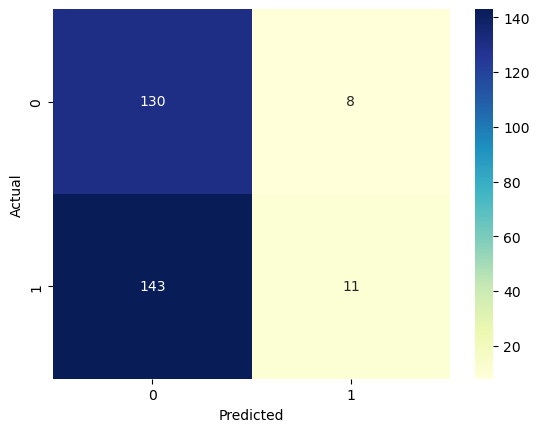

In [309]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Multiclass confusion matrix

In [310]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.4828767123287671
Precision: 0.5789473684210527
Recall: 0.07142857142857142
